In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

# 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [20]:
claims = pd.read_csv('claims.csv')
cust = pd.read_csv('cust_demographics.csv')

In [21]:
cust_claims = pd.merge(left = claims, right = cust, how = 'left', left_on = 'customer_id', right_on = 'CUST_ID')

cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold


# 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [22]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  CUST_ID              1085 non-null   float64
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [23]:
cust_claims.claim_date = pd.to_datetime(cust_claims.claim_date)

cust_claims.DateOfBirth = pd.to_datetime(cust_claims.DateOfBirth)

In [24]:
cust_claims.Contact = pd.to_numeric(cust_claims.Contact.str.replace("-",""), downcast = "integer")

In [25]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   object        
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
 10  CUST_ID              1085 non-null   float64       
 11  gender               1085 non-null   object        
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

#  3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [26]:
cust_claims.claim_amount = pd.to_numeric(cust_claims.claim_amount.str.replace("$",""), downcast = "float")

C:\Users\abhij\AppData\Local\Temp\ipykernel_9024\2812617819.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claims.claim_amount = pd.to_numeric(cust_claims.claim_amount.str.replace("$",""), downcast = "float")


In [27]:
cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,2.655431e+09,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,9.568719e+09,Gold


#  4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [28]:
cust_claims['Flag'] = np.where(cust_claims.police_report == 'Unknown',0,1)

# 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

In [29]:
cust_claims = cust_claims.drop_duplicates(subset = 'CUST_ID', keep = 'last')

In [30]:
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,1
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,2.655431e+09,Silver,0
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,7.523983e+09,Gold,1
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,2.569689e+09,Silver,1
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,1.423247e+09,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152.0,Female,1996-07-07,ID,5.294622e+09,Silver,1
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166.0,Male,1990-04-11,WI,7.126520e+09,Gold,1
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802.0,Female,2064-10-22,LA,4.693456e+09,Silver,1
1084,63226031,61575264,Natural causes,2017-03-16,Auto,No,Material only,1490.0,1.0,No,61575264.0,Male,1995-07-12,WY,1.823851e+09,Gold,1


# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [31]:
cust_claims.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 1
gender                  1
DateOfBirth             1
State                   1
Contact                 1
Segment                 1
Flag                    0
dtype: int64

In [32]:
cust_claims.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float64
Segment                        object
Flag                            int32
dtype: object

In [33]:
cust_claims.claim_amount = cust_claims.claim_amount.fillna(cust_claims.claim_amount.mean())

cust_claims.total_policy_claims = cust_claims.total_policy_claims.fillna(cust_claims.total_policy_claims.mean())


In [34]:
cust_claims.dropna(inplace = True )

## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria 

Children < 18

Youth 18-30

Adult 30-60

Senior > 60

In [35]:
cust_claims.DateOfBirth = np.where(cust_claims.DateOfBirth.dt.year > 2000, cust_claims.DateOfBirth - dt.timedelta(days = 365.25*100),
                                   cust_claims.DateOfBirth)

In [36]:
cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,1
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,0
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,7.523983e+09,Gold,1
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,2.569689e+09,Silver,1
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,1.423247e+09,Silver,0


In [37]:
age = cust_claims.claim_date - cust_claims.DateOfBirth
age = age.dt.days/365.25

In [38]:
cust_claims['Age'] = age

In [39]:
cust_claims['AgeGroup'] = np.where(cust_claims.Age < 18, 'Children', 
                                   np.where(cust_claims.Age <= 30, 'Youth',
                                            np.where(cust_claims.Age <= 60, 'Adult', 'Senior')))

In [42]:
cust_claims['Age'] = cust_claims.Age.astype(np.int32)

#  8. What is the average amount claimed by the customers from various segments?

In [43]:
avg_claim_by_segment = cust_claims.groupby('Segment')['claim_amount'].mean()
avg_claim_by_segment

Segment
Gold        12847.800781
Platinum    12372.635742
Silver      12269.077148
Name: claim_amount, dtype: float32

# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [44]:
date = '2018-10-01'
date = pd.to_datetime(date)
ndate = date - dt.timedelta(days = 20)
ndate

Timestamp('2018-09-11 00:00:00')

In [45]:
df = cust_claims[cust_claims.claim_date <ndate]

In [46]:
df.groupby('incident_cause')['claim_amount'].sum().astype(np.int32)

incident_cause
Crime                  722056
Driver error          3316134
Natural causes        1312959
Other causes          3723600
Other driver error    3277843
Name: claim_amount, dtype: int32

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [47]:
cust_claims.incident_cause.value_counts()

Other causes          284
Driver error          259
Other driver error    243
Natural causes        185
Crime                 107
Name: incident_cause, dtype: int64

In [48]:
df1 = cust_claims[cust_claims.incident_cause.isin(['Driver error','Other driver error'])]

In [49]:
df1 = df1[df1.State.isin(['TX' , 'DE' , 'AK'])]

In [50]:
df1 = df1[df1.AgeGroup == 'Adult']

In [51]:
df1.groupby('State')['State'].count()

State
AK    8
DE    9
TX    6
Name: State, dtype: int64

# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart. 

In [52]:
claim =  cust_claims.pivot_table(index = 'gender', columns = 'Segment', values = 'claim_amount', aggfunc = 'sum')
claim

Segment,Gold,Platinum,Silver
gender,,,
Female,2110257.0,2369887.50,1897612.00
Male,2656277.0,2096634.25,2347488.75


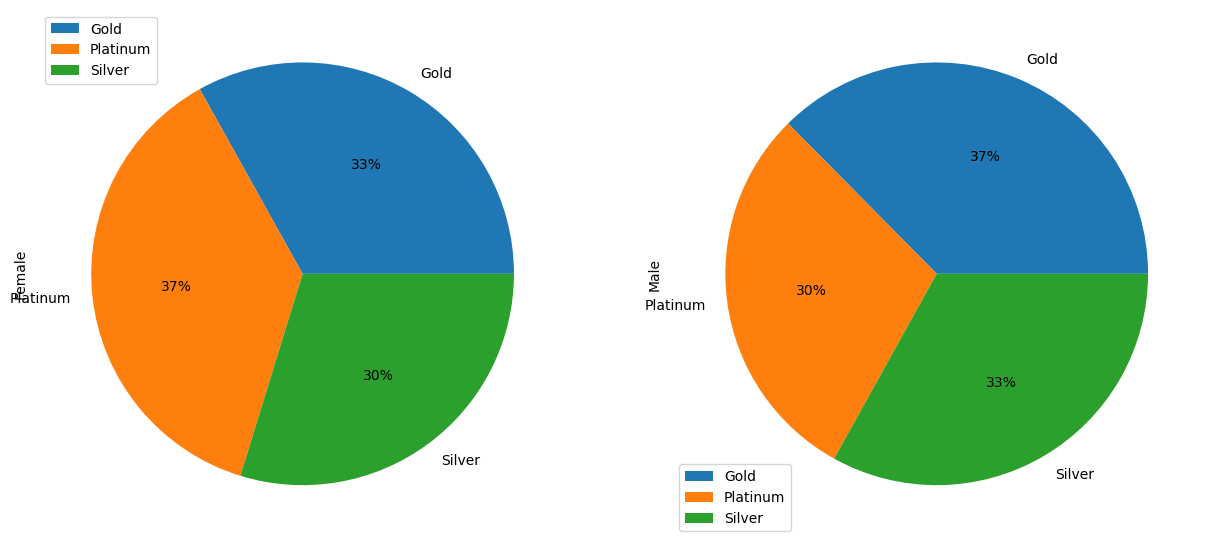

In [53]:
claim.T.plot(kind = 'pie', subplots = True, figsize = (15,8), autopct='%1.0f%%')
plt.show()

#  12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [54]:
claim_by_gender = cust_claims.loc[(cust_claims['incident_cause'].isin(['Driver error','Other driver error']))].groupby('gender')['gender'].count()

<AxesSubplot:xlabel='gender'>

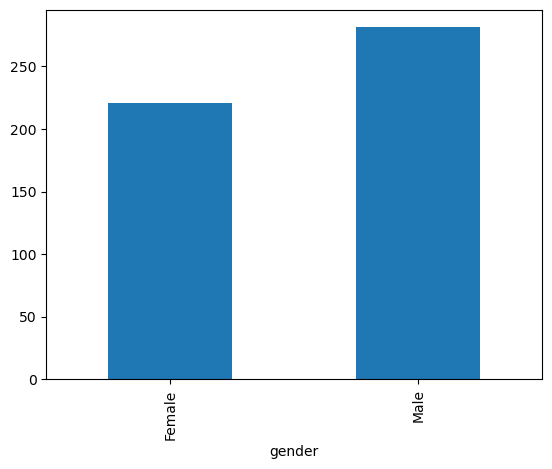

In [55]:
claim_by_gender.plot(kind='bar')

#  13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [56]:
df2 = cust_claims[cust_claims.fraudulent == 'Yes'].groupby('AgeGroup')['AgeGroup'].count()

<AxesSubplot:xlabel='AgeGroup'>

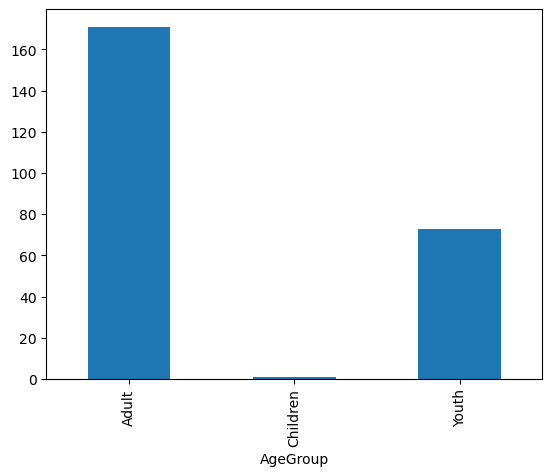

In [57]:
df2.plot(kind = 'bar')

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in achronological order not alphabetical order.

In [58]:
cust_claims['claim_month'] = cust_claims['claim_date'].dt.month

In [59]:
df2 = cust_claims.groupby('claim_month')['claim_amount'].sum().astype(np.int32)

<AxesSubplot:xlabel='claim_month'>

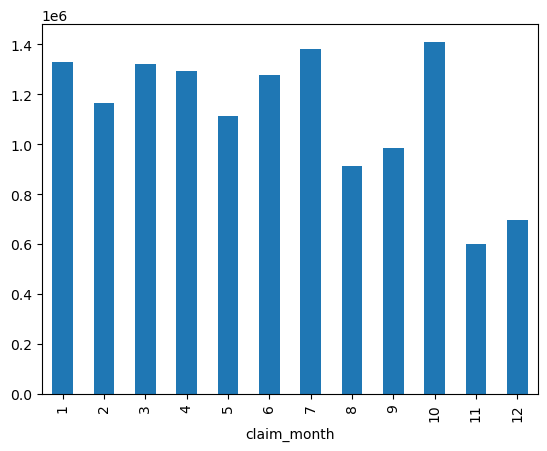

In [60]:
df2.plot(kind='bar')

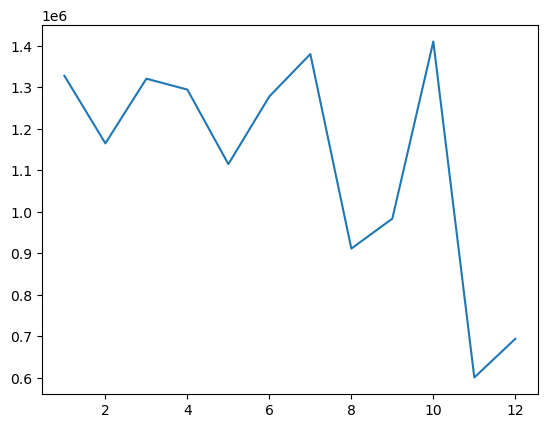

In [62]:
plt.plot(df2, label = 'Trend Line')

#  15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

<AxesSubplot:ylabel='fraudulent'>

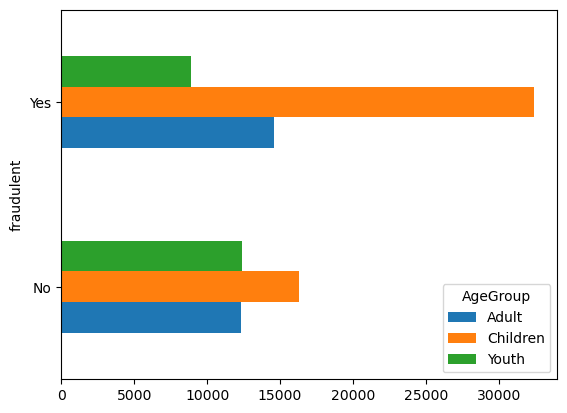

In [61]:
cust_claims.pivot_table(columns = 'AgeGroup', index = 'fraudulent', values = 'claim_amount', aggfunc = 'mean').plot(kind='barh')

# Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

## 16. Is there any similarity in the amount claimed by males and females?

In [63]:
male_data = cust_claims[cust_claims.gender == 'Male']['claim_amount']
female_data = cust_claims[cust_claims.gender == 'Female']['claim_amount']

In [64]:
mean_m = male_data.mean()
mean_f = female_data.mean()
print(mean_m)
print(mean_f)

12886.392578125
12102.005859375


In [65]:
t_stat, p_value = stats.ttest_ind(male_data,female_data)

In [66]:
print(t_stat)
print(p_value)

0.9633555428166622
0.33558557520616483


In [67]:
print (" There is no relationship for the amount claimed by males and females" )

 There is no relationship for the amount claimed by males and females


## 17. Is there any relationship between age category and segment?

In [68]:
data = pd.crosstab(cust_claims.AgeGroup, cust_claims.Segment, margins = True)

In [69]:
chi2 , p ,dof ,expected = stats.chi2_contingency(data)

In [70]:
print(chi2)
print(p)

5.295436552538789
0.8078314041652046


In [71]:
print(dof)

9


In [72]:
print(expected)

[[ 255.70779221  248.81539889  238.47680891  743.        ]
 [   2.75324675    2.67903525    2.567718      8.        ]
 [ 112.53896104  109.50556586  104.9554731   327.        ]
 [ 371.          361.          346.         1078.        ]]


In [73]:
print (" Business conclusion: Pvalue is > 0.05. There is no relationship between age category and segment" )

 Business conclusion: Pvalue is > 0.05. There is no relationship between age category and segment


## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [74]:
from scipy.stats import ttest_1samp

In [75]:
current_year_mean = cust_claims[cust_claims['claim_date'].dt.year == 2017]['claim_amount'].mean()
current_year_mean

12286.9833984375

In [76]:
current_year_std = cust_claims[cust_claims['claim_date'].dt.year == 2017]['claim_amount'].std()
current_year_std

13258.634765625

In [77]:
t, p = ttest_1samp(
    cust_claims[cust_claims['claim_date'].dt.year == 2017]['claim_amount'], 10000)
print("P-Value: ", p)
print("T-Statistic: ", t)

P-Value:  3.0278517005178043e-05
T-Statistic:  4.203942794272767


## 19. Is there any difference between age groups and insurance claims? 

In [78]:
age_group = cust_claims.groupby('AgeGroup')['claim_amount'].sum()

In [79]:
age_group

AgeGroup
Adult       9538174.00
Children     146407.00
Youth       3793575.25
Name: claim_amount, dtype: float32

In [80]:
children_group = cust_claims[cust_claims.AgeGroup == 'Children']['claim_amount']
Youth_group = cust_claims[cust_claims.AgeGroup == 'Youth']['claim_amount']
Adult_group = cust_claims[cust_claims.AgeGroup == 'Adult']['claim_amount']

In [81]:
tstat, pvalue = stats.f_oneway(children_group,Youth_group,Adult_group)

In [82]:
tstat

1.7326953204730684

In [83]:
pvalue

0.17730062639480312

In [84]:
print ("There is no difference between age groups and insurance claims" )

There is no difference between age groups and insurance claims


## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [85]:
tstat, pvalue = stats.pearsonr(cust_claims.total_policy_claims, cust_claims.claim_amount)

In [86]:
print(t_stat)
print(pvalue)

0.9633555428166622
0.4725101772076408


In [88]:
print ("There is no relationship between total number of policy claims and the claimed amount" )

There is no relationship between total number of policy claims and the claimed amount
